# Database Importları

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.tree import plot_tree as tree_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score

# 1. Soru + Veri Setinin Import Edilmesi

In [2]:
# Veri setini okuma
df = pd.read_csv('data_set.txt', delimiter='\t')

# Sütunları kısaltılmış bir şekilde isimlendirme
# NTP = Number of times pregnant
# glucoseTT = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# DBP = Diastolic blood pressure (mm Hg).
# ST = Triceps skinfold thickness (mm).
# SI = 2-Hour serum insulin (mu U/ml).
# BMI = Body mass index (weight in kg/(height in m)^2).
# DPF = Diabetes pedigree function.
# Age (years).
# CV = Class variable (0 or 1).
df.columns = ["NTP", "glucoseTT", "DBP", "ST", "SI", "BMI", "DPF", "AGE", "CV"]

print("DataFrame:")
print(df)

# Herhangi bir sıkıntı çıkarmaması için verileri sayısal değere dönüştürme
df = df.astype(float)

# Özellikleri hedef değişkenden ayırma
X = df.drop(columns=['CV'])
y = df['CV']

# Verinin 70%'inin train 30%'unun da test etmek amacıyla ayrılması
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=523050)

# Standart Scaler Fonksiyonu Yardımıyla Normalizasyon İşlemi
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

DataFrame:
     NTP  glucoseTT  DBP  ST   SI   BMI    DPF  AGE  CV
0      1         85   66  29    0  26.6  0.351   31   0
1      8        183   64   0    0  23.3  0.672   32   1
2      1         89   66  23   94  28.1  0.167   21   0
3      0        137   40  35  168  43.1  2.288   33   1
4      5        116   74   0    0  25.6  0.201   30   0
..   ...        ...  ...  ..  ...   ...    ...  ...  ..
762   10        101   76  48  180  32.9  0.171   63   0
763    2        122   70  27    0  36.8  0.340   27   0
764    5        121   72  23  112  26.2  0.245   30   0
765    1        126   60   0    0  30.1  0.349   47   1
766    1         93   70  31    0  30.4  0.315   23   0

[767 rows x 9 columns]


# 2. PCA ve LDA algoritmalarının Uygulanması

In [3]:
# PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

# LDA
lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], np.unique(y).size - 1))
X_lda = lda.fit_transform(X, y)

print("PCA için en ayırt edici öznitelikler: \n", pd.DataFrame(pca.components_, columns=X.columns))
print("")
print("LDA için en ayırt edici öznitelikler: \n", pd.DataFrame(lda.scalings_, columns=['CV']))

PCA için en ayırt edici öznitelikler: 
         NTP  glucoseTT       DBP        ST        SI       BMI       DPF  \
0  0.153184   0.445429  0.265216  0.369320  0.500935  0.337317  0.405559   
1  0.603874   0.144930  0.210957 -0.297261 -0.323132  0.030240 -0.177836   

        AGE  
0  0.205411  
1  0.586950  

LDA için en ayırt edici öznitelikler: 
          CV
0  0.094139
1  0.026956
2 -0.010591
3  0.000443
4 -0.000791
5  0.060571
6  0.670223
7  0.011694


# 3. Çoklu Doğrusal ve Multinominal Lojistik Regresyon ve Test kümesi İçin Performans Metriklerininin Hesaplanması (PCA'sız)

In [4]:
# Çoklu Doğrusal Regresyon analizi
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_coef = linear_reg_model.coef_

# Çoklu Doğrusal Regresyon performans metrikleri
def calculate_regression_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2
linear_reg_r2 = calculate_regression_metrics(
                                        y_test,
                                        linear_reg_model.predict(X_test)
                                    )

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model.fit(X_train, y_train)
logistic_reg_coef = logistic_reg_model.coef_

# Multinominal Lojistik Regresyon performans metrikleri
logistic_predictions = logistic_reg_model.predict(X_test)
logistic_reg_acc = accuracy_score(y_test,logistic_predictions)
logistic_reg_report = classification_report(y_test, logistic_predictions)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Sonuçları raporlama
print("\nÇoklu Doğrusal Regresyon Katsayıları: ", linear_reg_coef)
print("Çoklu Doğrusal Regresyon Performansı:")
print("R-kare (R^2) Değeri:", linear_reg_r2)

print("\nMultinominal Lojistik Regresyon Performansı:")
print("Accuracy:", logistic_reg_acc)
print("Classification Report:")
print(logistic_reg_report)
print("Confusion Matrix:")
print(logistic_reg_conf_matrix)


Çoklu Doğrusal Regresyon Katsayıları:  [ 0.08307241  0.18777614 -0.03896417  0.01815063 -0.00216646  0.09285775
  0.05416505  0.03286679]
Çoklu Doğrusal Regresyon Performansı:
R-kare (R^2) Değeri: 0.22470886207189578

Multinominal Lojistik Regresyon Performansı:
Accuracy: 0.7489177489177489
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       154
         1.0       0.66      0.52      0.58        77

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

Confusion Matrix:
[[133  21]
 [ 37  40]]


# 3. Kısım PCA İle Kullanımı

In [5]:
# Çoklu Doğrusal Regresyon analizi
linear_reg_model.fit(X_pca_train, y_train)
linear_reg_coef = linear_reg_model.coef_

# Çoklu Doğrusal Regresyon performans metrikleri
linear_reg_r2 = calculate_regression_metrics(
                                        y_test,
                                        linear_reg_model.predict(X_pca_test)
                                    )

# Multinominal Lojistik Regresyon analizi
logistic_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_reg_model.fit(X_pca_train, y_train)
logistic_reg_coef = logistic_reg_model.coef_

# Multinominal Lojistik Regresyon performans metrikleri
logistic_predictions = logistic_reg_model.predict(X_pca_test)
logistic_reg_acc = accuracy_score(y_test,logistic_predictions)
logistic_reg_report = classification_report(y_test, logistic_predictions)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Sonuçları raporlama
print("\nÇoklu Doğrusal Regresyon Katsayıları: ", linear_reg_coef)
print("Çoklu Doğrusal Regresyon Performansı:")
print("R-kare (R^2) Değeri:", linear_reg_r2)

print("\nMultinominal Lojistik Regresyon Performansı:")
print("Accuracy:", logistic_reg_acc)
print("Classification Report:")
print(logistic_reg_report)
print("Confusion Matrix:")
print(logistic_reg_conf_matrix)


Çoklu Doğrusal Regresyon Katsayıları:  [-0.1355642   0.08963054]
Çoklu Doğrusal Regresyon Performansı:
R-kare (R^2) Değeri: -0.3389883537234202

Multinominal Lojistik Regresyon Performansı:
Accuracy: 0.5367965367965368
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66       154
         1.0       0.27      0.23      0.25        77

    accuracy                           0.54       231
   macro avg       0.46      0.46      0.46       231
weighted avg       0.52      0.54      0.53       231

Confusion Matrix:
[[106  48]
 [ 59  18]]


# 4. Kısım Ağaç Yapısını ve Kestirim Sonuçları


Karar Ağacı Sınıflandırma Performansı:

------------- Accuracy:  0.645021645021645  -------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73       154
         1.0       0.47      0.51      0.49        77

    accuracy                           0.65       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.65      0.65      0.65       231

Confusion Matrix:
[[110  44]
 [ 38  39]]


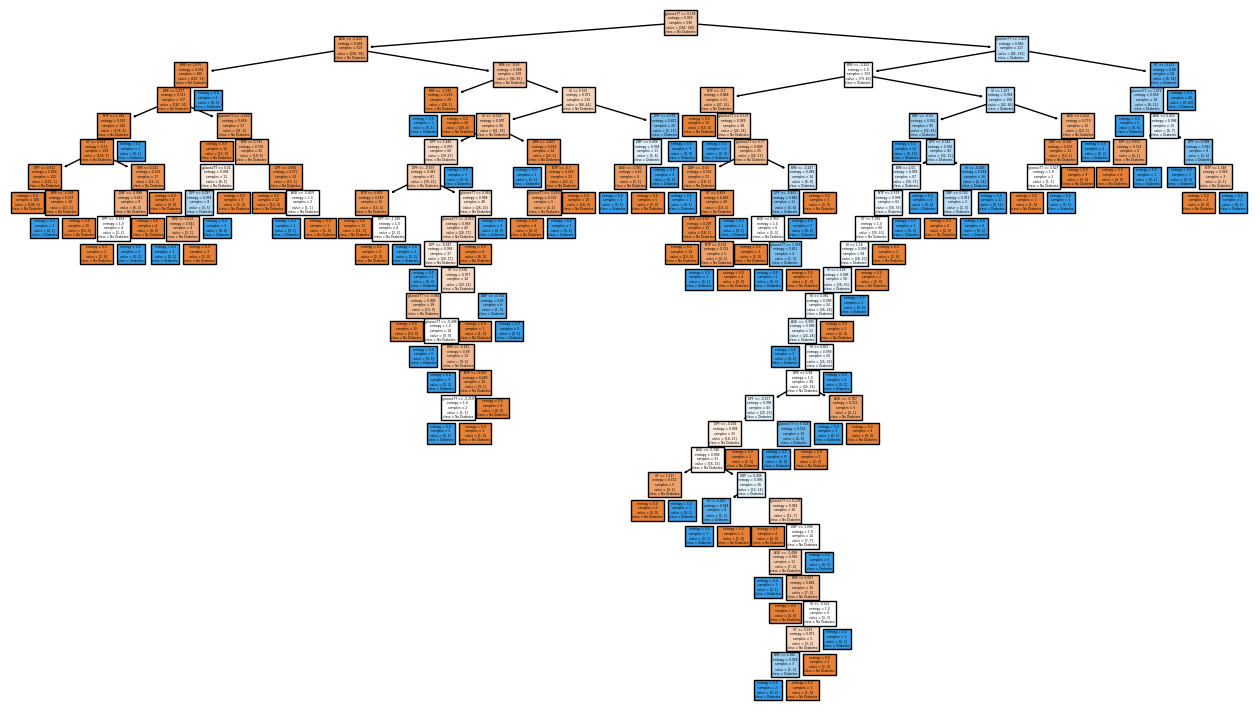

In [6]:
# Karar Ağacı Sınıflandırma performans metrikleri
dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Sonuçları raporlama
print("\nKarar Ağacı Sınıflandırma Performansı:")
print("\n------------- Accuracy: ", dt_acc, " -------------\n")
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_conf_matrix)

X_columns = ["NTP", "glucoseTT", "DBP", "ST", "SI", "BMI", "DPF", "AGE"]
pyplot.figure(figsize=(16, 9))
tree_model(dt_model, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
pyplot.show()

# 4. Kısım PCA ile


Karar Ağacı Sınıflandırma Performansı:

------------- Accuracy:  0.5108225108225108  -------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61       154
         1.0       0.30      0.36      0.33        77

    accuracy                           0.51       231
   macro avg       0.48      0.47      0.47       231
weighted avg       0.53      0.51      0.52       231

Confusion Matrix:
[[90 64]
 [49 28]]


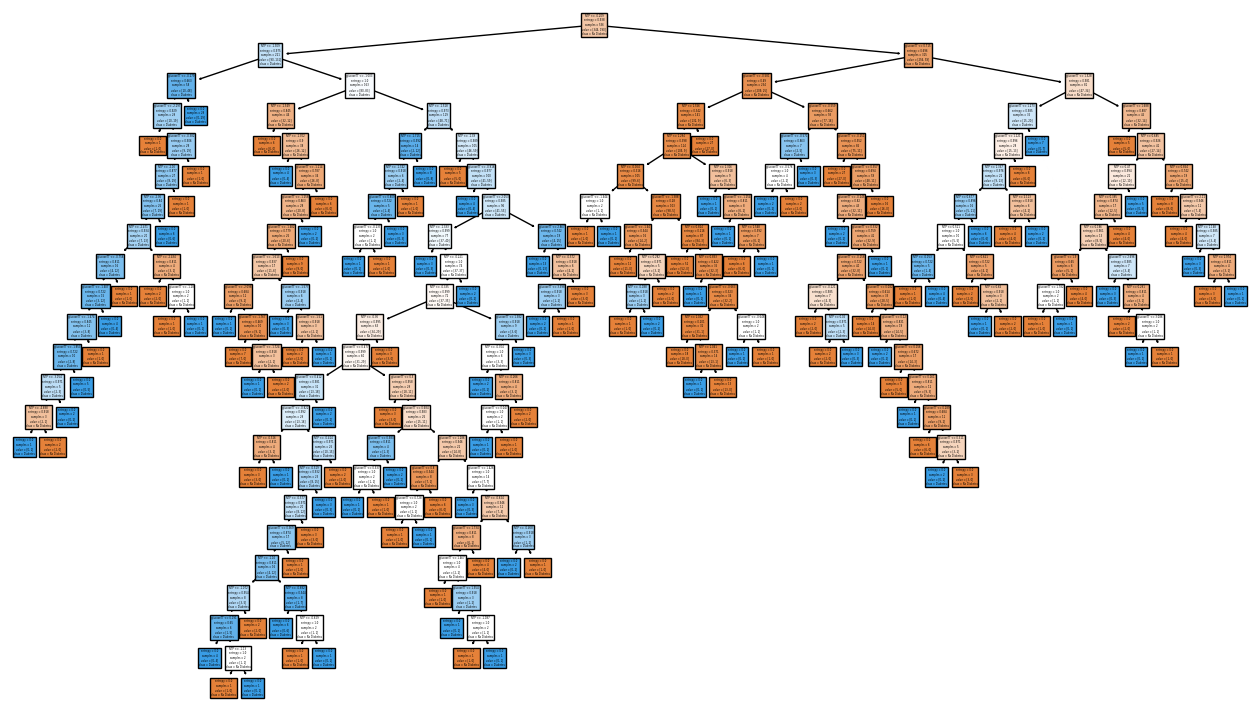

In [7]:
# Karar Ağacı Sınıflandırma performans metrikleri
dt_model.fit(X_pca_train, y_train)
y_pred_dt = dt_model.predict(X_pca_test)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Sonuçları raporlama
print("\nKarar Ağacı Sınıflandırma Performansı:")
print("\n------------- Accuracy: ", dt_acc, " -------------\n")
print("Classification Report:")
print(dt_report)
print("Confusion Matrix:")
print(dt_conf_matrix)

X_columns = ["NTP", "glucoseTT", "DBP", "ST", "SI", "BMI", "DPF", "AGE"]
pyplot.figure(figsize=(16, 9))
tree_model(dt_model, filled=True, feature_names=X_columns, class_names=["No Diabetes", "Diabetes"])
pyplot.show()

# 5. Kısım Naive Bayes Sınıflandırıcısı

In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_predictions = nb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_predictions)
print("Naive bayes doğruluk oranı:", test_accuracy)

print("\nTest Verisinin Confusion Matrixi\n")
print(confusion_matrix(y_test, y_predictions))
print("\nTest Verisinin Sınıflandırma Raporu\n")
print(classification_report(y_test, y_predictions))


Naive bayes doğruluk oranı: 0.7272727272727273

Test Verisinin Confusion Matrixi

[[123  31]
 [ 32  45]]

Test Verisinin Sınıflandırma Raporu

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80       154
         1.0       0.59      0.58      0.59        77

    accuracy                           0.73       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231



# 5. Kısım PCA İle

In [9]:
nb.fit(X_pca_train, y_train)

y_predictions = nb.predict(X_pca_test)

test_accuracy = accuracy_score(y_test, y_predictions)
print("Naive bayes doğruluk oranı:", test_accuracy)


print("\nTest Verisinin Confusion Matrixi\n")
print(confusion_matrix(y_test, y_predictions))
print("\nTest Verisinin Sınıflandırma Raporu\n")
print(classification_report(y_test, y_predictions))

Naive bayes doğruluk oranı: 0.5497835497835498

Test Verisinin Confusion Matrixi

[[113  41]
 [ 63  14]]

Test Verisinin Sınıflandırma Raporu

              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68       154
         1.0       0.25      0.18      0.21        77

    accuracy                           0.55       231
   macro avg       0.45      0.46      0.45       231
weighted avg       0.51      0.55      0.53       231

